In [1]:
from learningAgent import LearningAlgorithm
from environment import Model
from Qtable import QTable
from test import Test
import numpy as np
import os

In [2]:
np.random.seed(10)

In [3]:
total_Demand = 400
agent_Cost = 57
adv_Cost = 71
total_Stages = 25
num_Actions = 70
num_States = abs(adv_Cost - agent_Cost) + 2 * num_Actions + 1
Qtable = QTable(num_States, num_Actions, learning_Rate = [490000,500000])
adversary = Qtable.myopicReset()
init_State = [total_Demand/2, total_Demand/2]

game = Model(total_Demand, [agent_Cost,adv_Cost], total_Stages, init_State, adversary)

In [4]:
# Learning rate is given as [numerator,denominator] which gives us a learning rate function of 
# numerator/(n+demoninator)
Qtable = QTable(num_States, num_Actions, learning_Rate = [490000,500000])

In [5]:
numberEpisodes = 1_000_000
discountFactor = 0.99

In [6]:
algorithm = LearningAlgorithm(game, Qtable, numberEpisodes, discountFactor)

In [7]:
algorithm.solver()

In [8]:
# print(Qtable.Q_table)

In [9]:
result = Test(game, Qtable, discountFactor, adversary)

In [10]:
# Returns the optimal payoff and actions according to the Qtable
payoff, actions = result.totalPayoff()
print(payoff)
print(actions)

156578.3661572877
[ 81  94 103 100 105 106 113 105 106 113 105 106 113 105 106 113 105 106
 113 105 106 113 105 106 113]


In [11]:
# The percentage error of the Qtable
error = result.error()

In [12]:
error.mean()

0.0007133969659500548

In [13]:
Qtable.save('round_1_with_cost_57')

In [14]:
num_rounds = 100
payoffs = [0]*num_rounds
for i in range(num_rounds):
    adversary = Qtable.Q_table
    # Swap over players
    game = Model(total_Demand, [adv_Cost,agent_Cost], total_Stages, init_State, adversary)
    Qtable = QTable(num_States, num_Actions, learning_Rate = [490000,500000])
    algorithm = LearningAlgorithm(game, Qtable, numberEpisodes, discountFactor)
    algorithm.solver()

    adversary = Qtable.Q_table
    # Swap back over
    game = Model(total_Demand, [agent_Cost,adv_Cost], total_Stages, init_State, adversary)
    Qtable = QTable(num_States, num_Actions, learning_Rate = [490000,500000])
    algorithm = LearningAlgorithm(game, Qtable, numberEpisodes, discountFactor)
    algorithm.solver()
    result = Test(game, Qtable, discountFactor, adversary)
    payoff, actions = result.totalPayoff()
    payoffs[i] = payoff

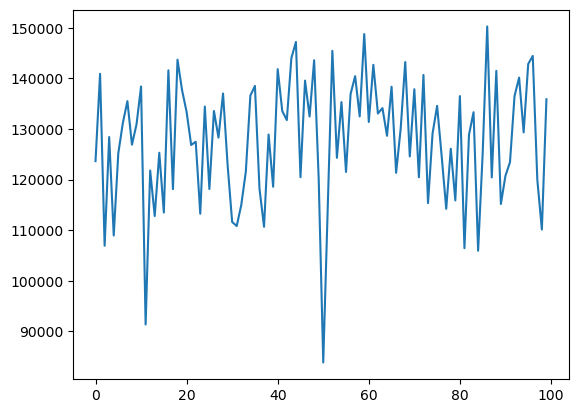

In [15]:
import matplotlib.pyplot as plt
plt.plot(payoffs)
plt.show()